# Get Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('CW1_data_202223.csv')

In [2]:
#Checking for duplicate values

df.duplicated().sum()


0

# Looking at dimensions of dataframe and checking datatypes of columns

In [3]:
print('\n---Information of the dataset --- \n')
print(df.info())
print('\n ---Column names of the dataset --- \n', df.columns)
df.shape


---Information of the dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB
None

 ---Column names of the dataset --- 
 Index(['id', 'Gender', 'Age', 'HasDrivingLicense', 'RegionI

(304887, 12)

In [4]:
df.head(10)

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,332804,Female,39.0,1.0,15.0,0.0,1-2 Year,NaN,"£2,645.30",55,227,1
1,116249,Male,38.0,1.0,11.0,NaN,1-2 Year,NaN,"£1,151.90",26,29,0
2,255006,Male,22.0,1.0,30.0,NaN,< 1 Year,NaN,"£2,265.90",152,166,0
3,317475,Female,23.0,1.0,NaN,NaN,< 1 Year,NaN,"£1,456.60",151,277,0
4,344213,Male,56.0,1.0,48.0,0.0,> 2 Years,NaN,£131.50,154,155,0
5,26230,Male,30.0,1.0,18.0,NaN,NaN,NaN,"£1,755.90",152,92,0
6,109100,NaN,48.0,1.0,28.0,0.0,1-2 Year,Yes,"£2,517.05",124,188,0
7,318078,Male,20.0,1.0,37.0,0.0,< 1 Year,Yes,"£2,365.30",160,220,0
8,104642,Female,23.0,1.0,47.0,0.0,< 1 Year,No,£131.50,152,163,0
9,107338,NaN,77.0,1.0,NaN,1.0,1-2 Year,No,£131.50,9,283,0


In [5]:
df.tail(10)

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
304877,137338,Male,NaN,1.0,12.0,NaN,< 1 Year,No,"£1,377.00",152,258,0
304878,54887,Female,27.0,1.0,11.0,NaN,NaN,No,"£1,272.25",152,144,0
304879,207893,Female,51.0,1.0,28.0,0.0,1-2 Year,NaN,"£2,534.65",26,126,0
304880,110269,Female,23.0,1.0,11.0,NaN,< 1 Year,No,"£1,502.15",152,60,0
304881,119880,Male,29.0,1.0,NaN,1.0,1-2 Year,Yes,£131.50,157,106,0
304882,259179,Female,24.0,1.0,36.0,NaN,NaN,No,"£1,128.75",152,287,0
304883,365839,Male,NaN,1.0,35.0,NaN,1-2 Year,NaN,"£2,064.35",124,298,0
304884,131933,Female,22.0,1.0,2.0,0.0,< 1 Year,NaN,£942.85,152,76,0
304885,146868,Male,44.0,1.0,32.0,NaN,1-2 Year,Yes,£131.50,156,51,0
304886,121959,Female,27.0,1.0,37.0,0.0,< 1 Year,NaN,"£1,237.05",152,127,1


# To make data anonymous and follow GDPR regulations we drop 'id' column.

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
#Removing '£' symbol and comma from AnnualPremium instances.
df['AnnualPremium'].dtypes
df.AnnualPremium = df.AnnualPremium.apply(lambda x:x.replace('£','').replace(',',''))
df['AnnualPremium'] = df['AnnualPremium'].astype(float)
df['AnnualPremium'].dtypes
df

,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,Female,39.0,1.0,15.0,0.0,1-2 Year,NaN,2645.30,55,227,1
1,Male,38.0,1.0,11.0,NaN,1-2 Year,NaN,1151.90,26,29,0
2,Male,22.0,1.0,30.0,NaN,< 1 Year,NaN,2265.90,152,166,0
3,Female,23.0,1.0,NaN,NaN,< 1 Year,NaN,1456.60,151,277,0
4,Male,56.0,1.0,48.0,0.0,> 2 Years,NaN,131.50,154,155,0
...,...,...,...,...,...,...,...,...,...,...,...
304882,Female,24.0,1.0,36.0,NaN,NaN,No,1128.75,152,287,0
304883,Male,NaN,1.0,35.0,NaN,1-2 Year,NaN,2064.35,124,298,0
304884,Female,22.0,1.0,2.0,0.0,< 1 Year,NaN,942.85,152,76,0
304885,Male,44.0,1.0,32.0,NaN,1-2 Year,Yes,131.50,156,51,0


# 1. Exploratory Data Analysis

# Initial Stats of Data

In [8]:
df.describe()

,Age,HasDrivingLicense,RegionID,Switch,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
count,274339.000000,274399.000000,274334.000000,152557.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,38.832561,0.997853,26.408892,0.458281,1528.592566,111.966591,154.272609,0.121970
std,15.504062,0.046281,13.213345,0.498258,862.712194,54.230069,83.642389,0.327251
min,20.000000,0.000000,0.000000,0.000000,131.500000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,1220.325000,26.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,1583.750000,131.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,1970.700000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,27008.250000,163.000000,299.000000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'HasDrivingLicense'}>,
        <AxesSubplot:title={'center':'RegionID'}>],
       [<AxesSubplot:title={'center':'Switch'}>,
        <AxesSubplot:title={'center':'AnnualPremium'}>,
        <AxesSubplot:title={'center':'SalesChannelID'}>],
       [<AxesSubplot:title={'center':'DaysSinceCreated'}>,
        <AxesSubplot:title={'center':'Result'}>, <AxesSubplot:>]],
      dtype=object)

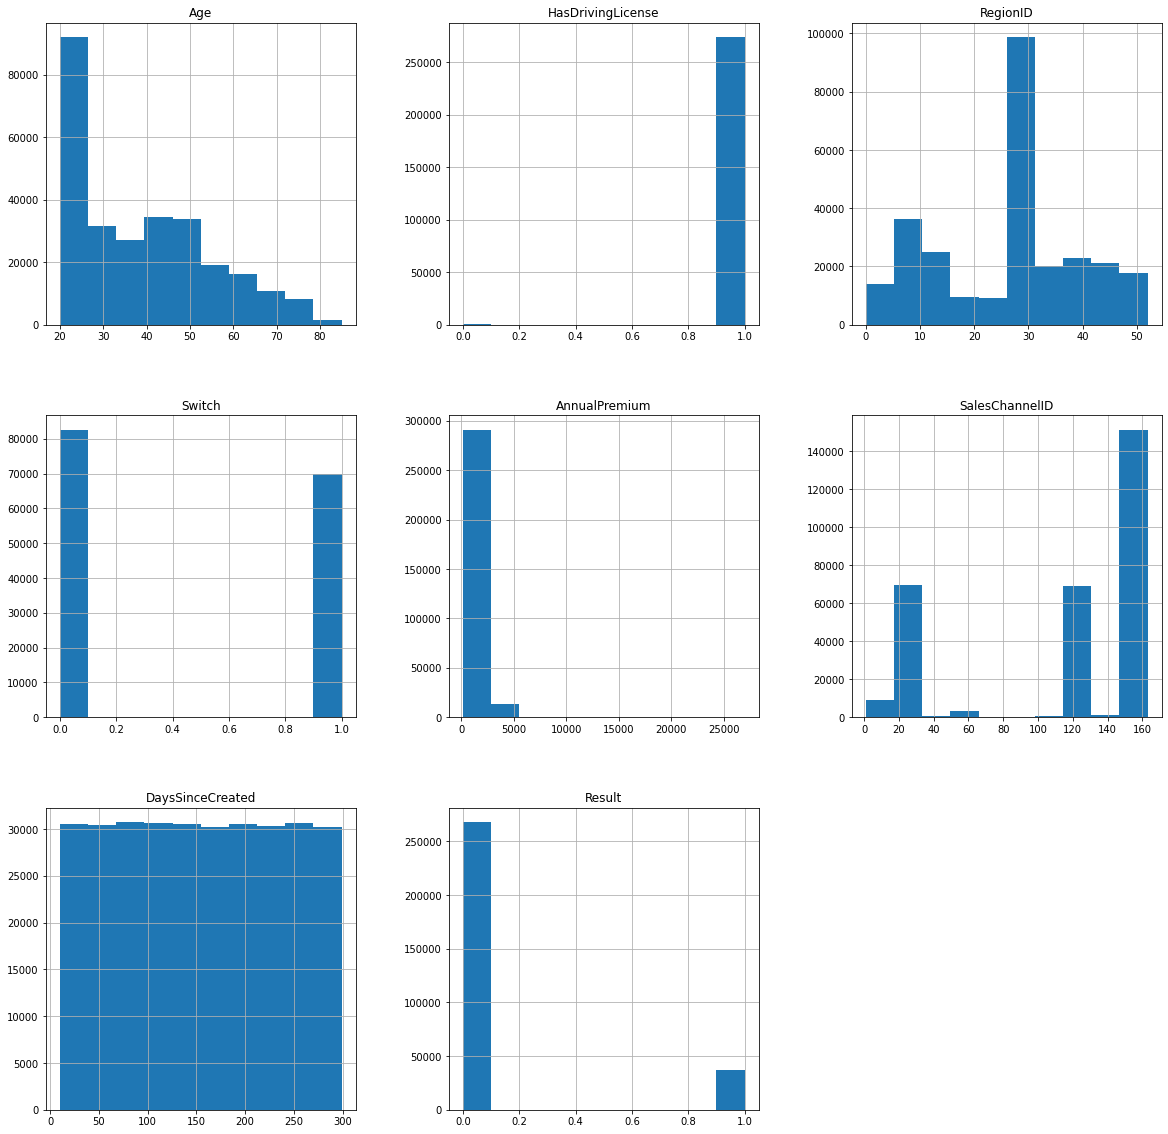

In [9]:
#Plotting histogram for each column

df.hist(figsize = (20,20))

Text(0, 0.5, 'count')

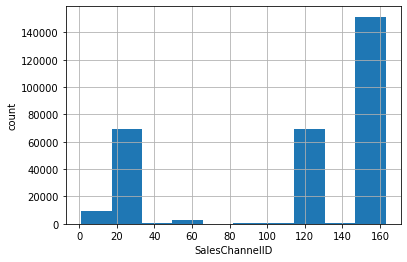

In [10]:
#Majority of SalesID are between 145-160
df.SalesChannelID.hist()
plt.xlabel('SalesChannelID')
plt.ylabel('count')

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='HasDrivingLicense', ylabel='Age'>,
        <AxesSubplot:xlabel='RegionID', ylabel='Age'>,
        <AxesSubplot:xlabel='Switch', ylabel='Age'>,
        <AxesSubplot:xlabel='AnnualPremium', ylabel='Age'>,
        <AxesSubplot:xlabel='SalesChannelID', ylabel='Age'>,
        <AxesSubplot:xlabel='DaysSinceCreated', ylabel='Age'>,
        <AxesSubplot:xlabel='Result', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='HasDrivingLicense'>,
        <AxesSubplot:xlabel='HasDrivingLicense', ylabel='HasDrivingLicense'>,
        <AxesSubplot:xlabel='RegionID', ylabel='HasDrivingLicense'>,
        <AxesSubplot:xlabel='Switch', ylabel='HasDrivingLicense'>,
        <AxesSubplot:xlabel='AnnualPremium', ylabel='HasDrivingLicense'>,
        <AxesSubplot:xlabel='SalesChannelID', ylabel='HasDrivingLicense'>,
        <AxesSubplot:xlabel='DaysSinceCreated', ylabel='HasDrivingLicense'>,
        <AxesSubplot:xlabel='Result'

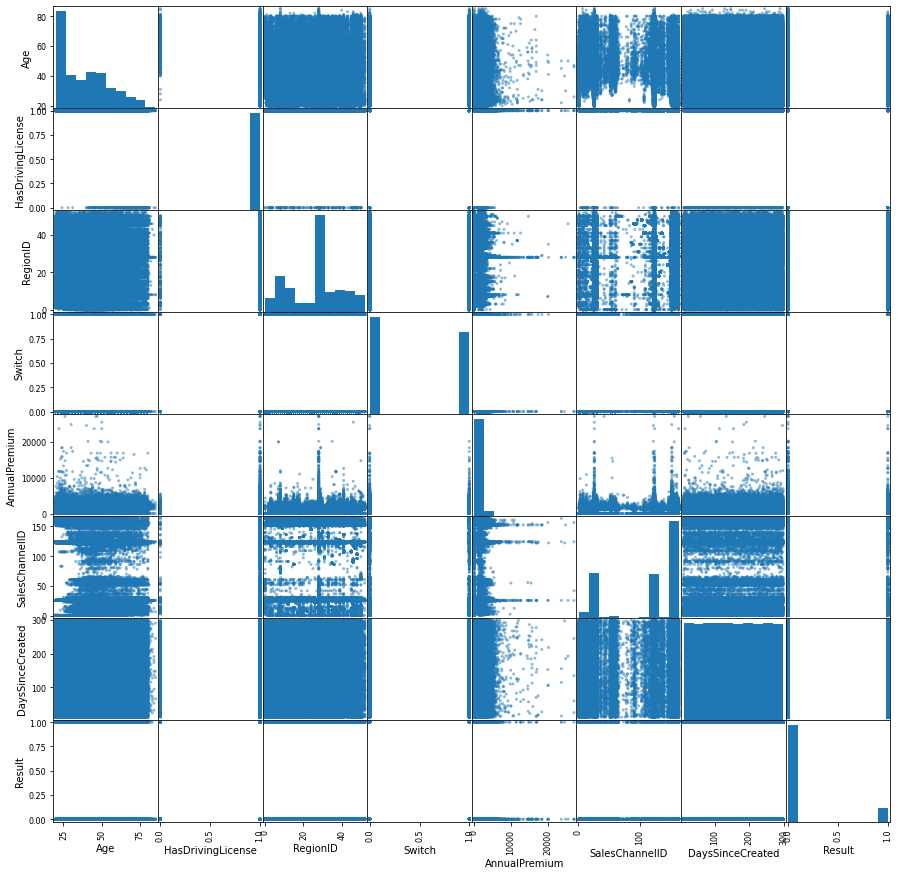

In [11]:
#Plotting scatter plot for each column

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 15))

                        Age  HasDrivingLicense  RegionID    Switch  \
Age                1.000000          -0.080243  0.042637 -0.257237   
HasDrivingLicense -0.080243           1.000000 -0.002070  0.011623   
RegionID           0.042637          -0.002070  1.000000 -0.018831   
Switch            -0.257237           0.011623 -0.018831  1.000000   
AnnualPremium      0.067461          -0.014098 -0.010064  0.003163   
SalesChannelID    -0.576164           0.043844 -0.042514  0.219808   
DaysSinceCreated  -0.002235          -0.001453 -0.004254  0.002117   
Result             0.111939           0.009580  0.011969 -0.337895   

                   AnnualPremium  SalesChannelID  DaysSinceCreated    Result  
Age                     0.067461       -0.576164         -0.002235  0.111939  
HasDrivingLicense      -0.014098        0.043844         -0.001453  0.009580  
RegionID               -0.010064       -0.042514         -0.004254  0.011969  
Switch                  0.003163        0.219808     

<AxesSubplot:>

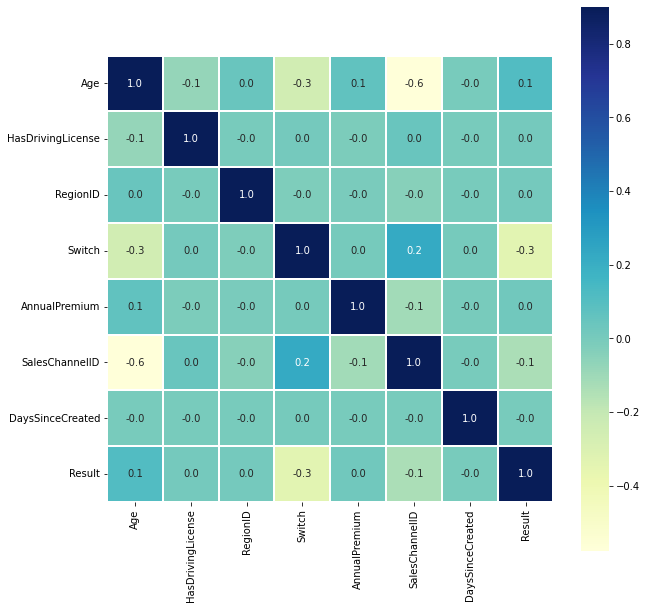

In [29]:
#Plotting correlation matrix and visualising heatmap

corr_matrix = df.corr() 
print(corr_matrix)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot=True, linewidths=0.3, cmap="YlGnBu", fmt=".1f")

<AxesSubplot:>

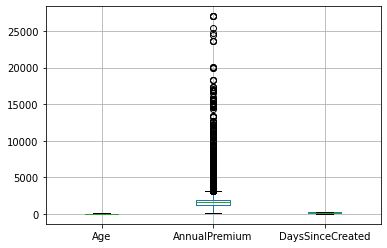

In [12]:
# Checking for Outliers in Numerical Columns

df[['Age', 'AnnualPremium','DaysSinceCreated']].boxplot()

In [13]:
#Outliers detected in 'AnnualPremium'
#Function for Counting number of outliers

def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [14]:
outlier_indices, outlier_values = find_outliers_tukey(df['AnnualPremium'])
print(len(np.sort(outlier_values)))

8231


In [15]:
df.VehicleAge.value_counts() #Majority of people have bought car in last 2 years

1-2 Year     144374
< 1 Year     118528
> 2 Years     11544
Name: VehicleAge, dtype: int64

# Since most number of people are between Age 20-25. Also majority of people have bought car in last 2 years. Hence, they may pay more Annual Premium than others as young people drive more carelessly than older people. I consider these as true outliers.

# 2. Data Preprocessing

# Missing values

In [16]:
# Check for missing values
df.isna().sum()

Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64

In [17]:
#Filling Switch and PastAccident columns with mode can create biased data as they are 50% missing
# So delete all instances that have missing values for the features of Switch,PastAccident
# We still have 76k rows after dropping missing instances

print('Data size BEFORE deleteting instances with missing values: ', df.shape)

df1 = df.dropna(subset=['Switch', 'PastAccident'])   
print('\nData size AFTER deleteting instances containing missing values: ', df1.shape)
df1.isna().sum()

Data size BEFORE deleteting instances with missing values:  (304887, 11)

Data size AFTER deleteting instances containing missing values:  (76048, 11)


Gender               7469
Age                  7604
HasDrivingLicense    7595
RegionID             7594
Switch                  0
VehicleAge           7546
PastAccident            0
AnnualPremium           0
SalesChannelID          0
DaysSinceCreated        0
Result                  0
dtype: int64

# Preprocessing Pipeline & ColumnTransformer
We use Pipelining and ColumnTransformer as it prevents data leakage and allow to include the preprocessing steps in the hyperparameter tuning.

We do the following transformations:
1. Missing values
2. Feature scaling
3. One hot Encoding
4. Ordinal Encoding.

# Splitting dataset into input Columns(df1_x) and Output column(df1_y)

In [18]:
df1_x=df1.drop('Result',1)
df1_y=df1.Result

C:\Users\MOHAMMEDzakir\AppData\Local\Temp\ipykernel_21732\4160929059.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1_x=df1.drop('Result',1)


# Splitting training and testing data

In [19]:
from sklearn.model_selection import train_test_split

# 70% of the data for traingin, 30% for test, i.e., test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(df1_x, df1_y, test_size=0.3, random_state=42, stratify=df1_y) 

# Instructions for Feature Transformations.

Remaining columns have missing values ~10%, hence we can impute with mode and median.

Doing One Hot Encoding on Gender, PastAccident and Imputing their missing values with Mode. As they are categorical. Also dropping 1 column for each classes to avoid multicollinearity issue.

HasDrivingLicense is already numbers, so we just impute missing values with Mode.

Switch- Nothing to do, as it is already in binary form and missing values were dealt previously.

Since VehicleAge is an Ordinal categorical variable in string form, we do Ordinal Encoding to convert it to numeric order and impute missing values with mode.

SalesChannelID and RegionID missing values are imputed with mode and apply StandardScaler() to scale values in range -1 to 1.

Age,AnnualPremium and DaysSinceCreated are numerical feature, hence we impute missing values with median and apply StandardScaler() to scale values in range -1 to 1.

# Pipeline and ColumnTransformer

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.compose import make_column_transformer

# transformer for imputing missing values with mode in Gender and PastAccident and doing One hot Encoding.
categorical_features = ['Gender','PastAccident']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore',drop='first'))
    ]
)

#Transformer for Imputing mode for missing values in HasDrivingLicesne
features=['HasDrivingLicense']
feature_transformer= Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent'))
    ]
)

# Transformer for Ordinal categorical feature
ordinal_categorical_feature=['VehicleAge']
ordinal_transformer=Pipeline(
    [
      ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
      ('ord_enc',OrdinalEncoder())
    ]
)

# transformer for imputing missing values with median in 'Age','AnnualPremium','DaysSinceCreated'  and Scaling them between -1 to 1.
numeric_features = ['Age','AnnualPremium','DaysSinceCreated']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

#Transformer for imputing missing values with mode in SalesChannelID and RegionID and Scaling them between -1 to 1.

feature_scaled=['SalesChannelID','RegionID']
feature_scaler=Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'most_frequent')),
        ('scaler', StandardScaler())
    ]
)


# combine them all in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features),('ordinals',ordinal_transformer,ordinal_categorical_feature),
        ('Mode_imputed',feature_transformer,features),('ID_scaled',feature_scaler,feature_scaled)
    ],
    remainder = 'passthrough'
)



# Processed Datasets to be used for further model implementation and evaluation.

In [21]:
# X_train_processed and X_test_processed are being used for further steps. y_train and y_test remains same.

X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)

print(X_train_processed[0:20, :])

[[ 0.    0.   -1.06  0.42 -0.66  1.    1.    0.73 -0.92  1.  ]
 [ 0.    1.    2.34 -0.3   0.4   0.    1.   -1.59  0.11  0.  ]
 [ 1.    1.    0.78 -0.46 -1.53  0.    1.    0.22  0.27  0.  ]
 [ 0.    0.   -0.17 -0.04 -0.77  0.    1.    0.18  0.11  1.  ]
 [ 0.    1.   -0.17 -1.61  0.19  0.    1.    0.81  0.19  0.  ]
 [ 1.    0.   -0.31  0.25 -0.64  0.    1.    0.22  1.15  0.  ]
 [ 0.    0.    0.78  0.3   0.29  0.    1.   -1.59 -1.88  1.  ]
 [ 0.    0.   -1.12 -0.42  1.69  1.    1.    0.88  1.15  1.  ]
 [ 0.    1.   -0.65 -0.1   0.83  0.    1.    0.73  1.55  0.  ]
 [ 0.    0.   -0.92  0.81  1.41  0.    1.    0.22 -0.21  0.  ]
 [ 1.    1.    2.4  -0.19 -1.57  0.    1.   -1.59 -0.61  0.  ]
 [ 1.    0.    0.78 15.13 -1.51  0.    1.    0.73  0.11  1.  ]
 [ 1.    1.   -0.17  0.1  -1.49  0.    1.   -1.54  0.11  1.  ]
 [ 0.    1.   -0.31  0.46 -0.72  0.    1.   -1.5   1.63  0.  ]
 [ 0.    1.   -0.99 -0.03 -0.71  1.    1.    0.73 -1.4   0.  ]
 [ 1.    1.    0.37  1.03 -0.35  0.    1.   -1.59  0.11

# Model imports

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [23]:
from warnings import filterwarnings
filterwarnings('ignore')

# Since we want to do classification(Result: 1/0) we apply various classification models and do hyperparameter tuning.

# Modelling and HyperParameter Tuning Using GridSearchCV
With GridSearchCV we loop through predefined hyperparameters and fit our estimator (model) on our (X_train_processed,y_train) dataset. So, in the end, I can select the best parameters from the listed hyperparameters.

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7, 8, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}])]

In [26]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train_processed, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 87.87%
Best Parameters :  {'C': 0.25, 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 82.56%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 87.12%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}

----------------

AdaBoostClassifier():
Best Accuracy : 87.87%
Best Parameters :  {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 0}

----------------

GradientBoostingClassifier():
Best Accuracy : 87.87%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eva

# Choosing 3 Models based on accuracy score and model generalisation capabilities.
1. LogisticRegression():
Best Accuracy : 87.87%
2. SVC():
Best Accuracy : 87.87%

AdaBoostClassifier,GradientBoostingClassifier and XGBClassifier all have accuracy= 87.87%

Also, we have outliers and Gradient Boosting algorithm is more robust to outliers than AdaBoost, we choose Gradient Boosting over AdaBoost.
Further, XGBoost uses advanced regularization (L1 & L2), which improves model generalization capabilities. XGBoost delivers high performance as compared to Gradient Boosting. Also, the imbalance in our target variable is well adjusted by XGBoost and hence we choose XGBoost between all of them.

3. XGBoost

# Model Evaluation and Optimization
Since we are interested in classification we use Classification Metrics (accuracy, precision, recall,F1-score,Confusion matrix, ROC, AUC,) for model evaluation.

In [27]:
from collections import Counter
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from collections import Counter

# 1. Logistic Regression

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     20048
           1       0.00      0.00      0.00      2767

    accuracy                           0.88     22815
   macro avg       0.44      0.50      0.47     22815
weighted avg       0.77      0.88      0.82     22815

ROC AUC score: 0.8182757839443376
Accuracy Score:  0.8787201402586018


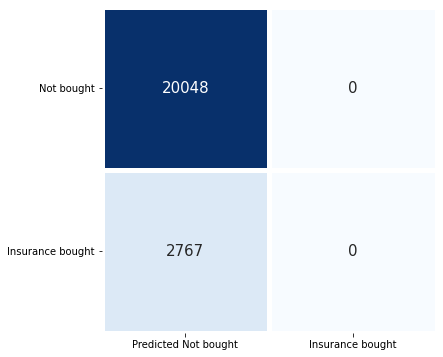

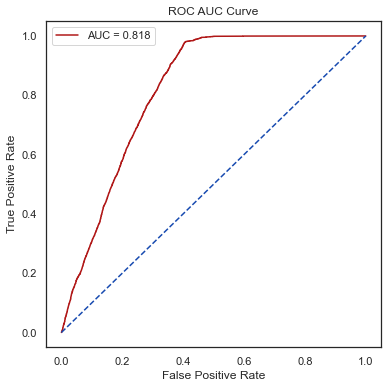

<Figure size 432x432 with 0 Axes>

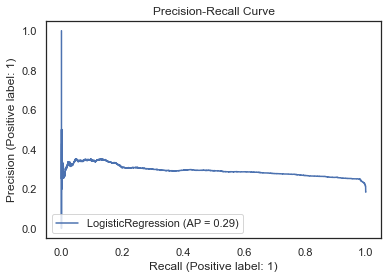

In [30]:
#Fitting Logistic Regression Model
accuracies = {}
classifier = LogisticRegression(C= 0.75, random_state= 0)
classifier.fit(X_train_processed, y_train)
y_pred = classifier.predict(X_test_processed)
y_prob = classifier.predict_proba(X_test_processed)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not bought', 'Insurance bought'], xticklabels = ['Predicted Not bought', 'Insurance bought'])
plt.yticks(rotation=0)
plt.show()

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Logistic Regression'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test_processed, y_test)
plt.title('Precision-Recall Curve')
plt.show()

# 2. XGBoost

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     20048
           1       1.00      0.00      0.00      2767

    accuracy                           0.88     22815
   macro avg       0.94      0.50      0.47     22815
weighted avg       0.89      0.88      0.82     22815

ROC AUC score: 0.8500538984716405
Accuracy Score:  0.8787639710716634


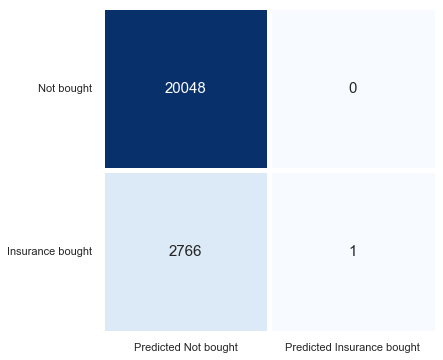

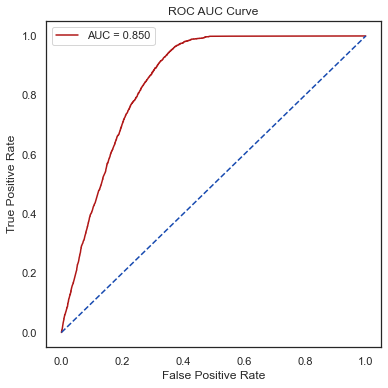

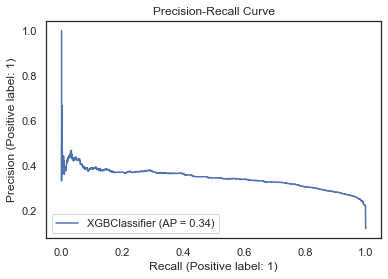

In [31]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
classifier.fit(X_train_processed, y_train)
y_pred = classifier.predict(X_test_processed)
y_prob = classifier.predict_proba(X_test_processed)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not bought', 'Insurance bought'], xticklabels = ['Predicted Not bought', 'Predicted Insurance bought'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['XGBoost'] = acc

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test_processed, y_test)
plt.title('Precision-Recall Curve')
plt.show()

# 3. SVC

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     20048
           1       0.00      0.00      0.00      2767

    accuracy                           0.88     22815
   macro avg       0.44      0.50      0.47     22815
weighted avg       0.77      0.88      0.82     22815

ROC AUC score: 0.7793794441587389
Accuracy Score:  0.8786763094455402


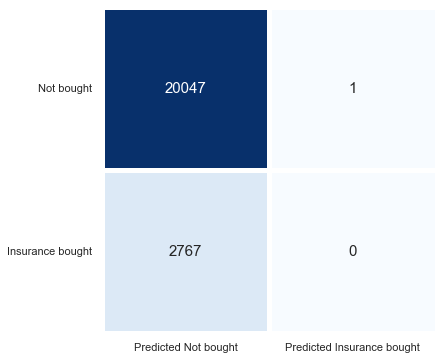

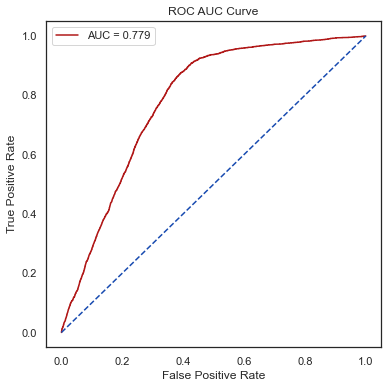

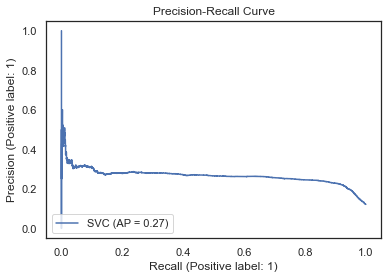

In [32]:
#Fitting SVC Model
classifier = SVC(C= 1, kernel= 'rbf', random_state= 0, probability=True)
classifier.fit(X_train_processed, y_train)
y_pred = classifier.predict(X_test_processed)
y_prob = classifier.predict_proba(X_test_processed)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not bought', 'Insurance bought'], xticklabels = ['Predicted Not bought', 'Predicted Insurance bought'])
plt.yticks(rotation = 0)
plt.show()

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['SVC'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test_processed, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [33]:
df_tuned = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_tuned.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_tuned

,Model,Accuracy
1,XGBoost,87.876397
0,Logistic Regression,87.872014
2,SVC,87.867631


# Summary
◉ After conducting significant data analysis, I experimented with various classification models to see how well they performed on the dataset. With accuracy, roc, precision, and recall score, I obtained quite decent results. I think choosing other methods for filling missing values in Switch and PastAccident columns can make Confusion matrix consistence.

◉ Using Grid Search, I fine-tuned the hyperparamters and did model evaluation usign the classification report, which included Confusion matrix,ROC AUC, F1-score and Precision-Recall curves for various models.

◉ With that, I came to conclusion that Logistic Regression,SVC, and The Boosting Algoritm: XGBoost are models which are best fit for our dataset.

◉ After Optimization the XGBoost algorithm has the Highest Accuracy of exactly 87.87% & AUC of 0.85.